In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython.display import display

In [2]:
# Load the dataset from csv file using pandas
data = pd.read_csv('D:\\Lomba Hackaton BCA\\fraud_detection\\data_input_csv\\data_input\\fraud_train.csv',index_col=False)
# Filling missing data in 'flag_transaksi_fraud' column
data['flag_transaksi_fraud'].isnull().sum()
data['flag_transaksi_fraud'].fillna(0, inplace = True)

Melihat di Series 'id_negara' terdapat nilai unik apa saja

In [3]:
set(data['id_negara'])

{-2, 45, 57, 64, 73, 96, 104, 149, 157, 168, 183, 188, 216}

In [4]:
data.loc[data['id_negara'] == 216]

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
1031,13142,2457420,2457449,103,-2,1798,-3,156,12,600000.0,...,5,8,False,3,999,439029.9451,3004500.0,40800.0,1.68,1
9187,14565,2457409,2457418,0,-2,1798,-3,156,12,1000000.0,...,5,8,False,3,999,335922.4615,2000000.0,100000.0,1.09,0
13010,12376,2457435,2457459,93,-2,1798,-3,156,12,1000000.0,...,3,8,False,3,999,683065.2174,8000000.0,20300.0,7.21,0


In [9]:
data.groupby('id_negara').flag_transaksi_fraud.value_counts()

id_negara  flag_transaksi_fraud
-2         1                           3
           0                           1
 45        0                           1
 57        0                           1
 64        0                           1
 73        0                           6
           1                           5
 96        0                       12184
           1                         897
 104       0                           5
 149       0                           6
           1                           4
 157       0                           3
 168       0                           2
 183       0                           1
 188       0                           2
 216       0                           2
           1                           1
Name: flag_transaksi_fraud, dtype: int64

Mari kita pastikan terlebih dahulu apakah ada nilai null pada feature yg akan kita gunakan

In [3]:
data.dropna(inplace=True)

In [4]:
data['maksimum_nilai_transaksi'].sort_values(axis=0, na_position='first').head()

1300      38000.0
4246      38000.0
12774    100000.0
2091     100000.0
11385    100000.0
Name: maksimum_nilai_transaksi, dtype: float64

Sekarang, mari kita tambahkan datetime columns pada DataFrame

In [5]:
time = data['waktu_transaksi']
time = time.tolist()

In [9]:
# change_format_time berfungsi utk mengubah format time menjadi 'jam', 'menit', dan 'detik'
def change_format_time(time):
    hour = int(time / 10000)
    minute = int((time - (hour*10000))/100)
    second = time - (hour*10000) - (minute*100)
    return hour, minute, second

hours = []
minutes = []
seconds = []

for element in time:
    hour, minute, second = change_format_time(element)
    hours.append(hour)
    minutes.append(minute)
    seconds.append(second)

In [12]:
data['hour'] = [x for x in hours if x is not None]
data['minute'] = [x for x in minutes if x is not None]
data['second'] = [x for x in seconds if x is not None]

In [14]:
data.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,hour,minute,second
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,19,39,55
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,7,31,40
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,3,999,1.552346e+07,100000000.0,41804.0,2.40,0,14,2,16
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,15,51,17
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,14,33,39


In [6]:
def time_to_second(time):
    hour = int(time / 10000)
    minute = int((time - (hour*10000))/100)
    second = time - (hour*10000) - (minute*100)
    result = (hour*3600) + (minute*60) + second
    return result

time_seconds = []

for element in time:
    result = time_to_second(element)
    time_seconds.append(result)

In [7]:
data['time_seconds'] = [x for x in time_seconds if x is not None]

In [8]:
data.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,time_seconds
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0,70795
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,27100
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0,50536
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0,57077
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0,52419


In [11]:
fraud_transaction = data.loc[data['flag_transaksi_fraud'] == 1, : ]
non_fraud = data.loc[data['flag_transaksi_fraud'] == 0, : ]

In [17]:
set(fraud_transaction['id_negara'])

{-2, 73, 96, 149, 216}

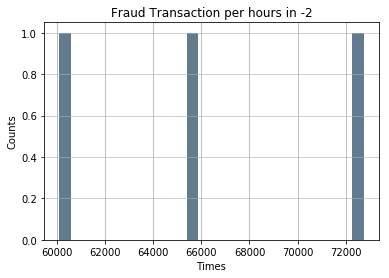

In [31]:
# Plot transaksi fraud di negara -2
fraud_transaction.loc[fraud_transaction['id_negara'] == -2, :]['time_seconds'].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')
plt.title('Fraud Transaction per hours in -2')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

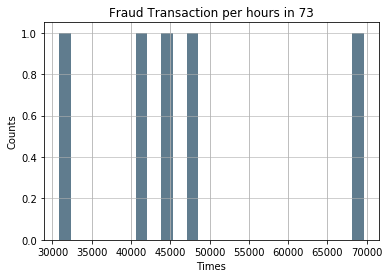

In [32]:
# Plot transaksi fraud di negara 73
fraud_transaction.loc[fraud_transaction['id_negara'] == 73, :]['time_seconds'].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')
plt.title('Fraud Transaction per hours in 73')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

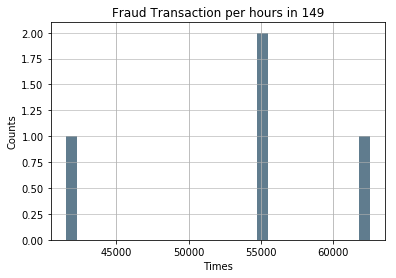

In [34]:
# Plot transaksi fraud di negara 149
fraud_transaction.loc[fraud_transaction['id_negara'] == 149, :]['time_seconds'].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')
plt.title('Fraud Transaction per hours in 149')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

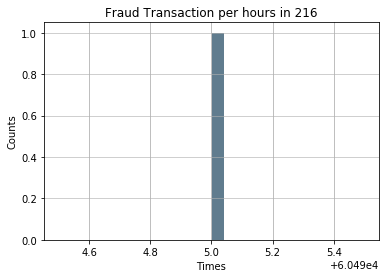

In [35]:
# Plot transaksi fraud di negara 216
fraud_transaction.loc[fraud_transaction['id_negara'] == 216, :]['time_seconds'].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')
plt.title('Fraud Transaction per hours in 216')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

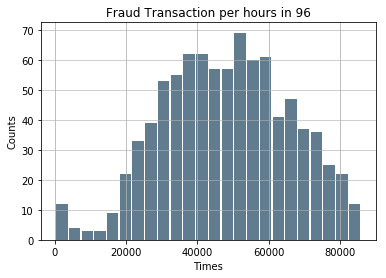

In [36]:
# Plot transaksi fraud di negara 96
fraud_transaction.loc[fraud_transaction['id_negara'] == 96, :]['time_seconds'].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')
plt.title('Fraud Transaction per hours in 96')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [39]:
fraud_transaction['id_negara'].value_counts()

 96     881
 73       5
 149      4
-2        3
 216      1
Name: id_negara, dtype: int64

In [22]:
data.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud', 'hour', 'minute',
       'second', 'time_seconds'],
      dtype='object')

In [40]:
fraud_transaction['kepemilikan_kartu'].value_counts()

2    549
1    345
Name: kepemilikan_kartu, dtype: int64

In [22]:
%matplotlib inline

Sekarang, mari kita pisahkan terlebih dahulu transaksi yg fraud dengan yg non fraud

In [12]:
fraud_transaction = data.loc[data['flag_transaksi_fraud'] == 1, : ]
non_fraud = data.loc[data['flag_transaksi_fraud'] == 0, : ]

In [13]:
fraud_transaction.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,grouped_time,selisih_transaksi
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1,1,1.130952e+06
16,3438,2457344,2457385,111,-2,1798,-3,156,12,1300000.0,...,False,3,999,1.121962e+06,2700000.0,19896.0,2.37,1,2,1.780375e+05
21,5508,2457555,2457614,104,-2,1798,2141266,238,9,500000.0,...,False,3,999,1.977290e+05,800000.0,30000.0,2.21,1,2,3.022710e+05
22,9188,2457445,2457539,111,-2,1798,1531787,385,11,300000.0,...,False,3,999,6.036315e+05,3500000.0,20900.0,2.15,1,2,3.036315e+05
50,5358,2457414,2457461,0,-2,1798,-3,156,12,100000.0,...,False,3,999,5.449843e+05,18139977.0,26500.0,3.23,1,2,4.449843e+05


In [23]:
data.maksimum_nilai_transaksi.max()

100000000.0

No handles with labels found to put in legend.


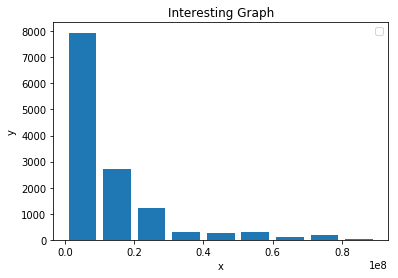

In [16]:
import matplotlib.pyplot as plt

bins = [x for x in range(0,100000000,10000000)]

plt.hist(data.maksimum_nilai_transaksi, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph')
plt.legend()
plt.show()

In [14]:
fraud_transaction.head()
file_name = 'D:\\Lomba Hackaton BCA\\fraud_detection\\data_input_csv\\data_input\\fraud_analysis.csv'
fraud_transaction.to_csv(file_name, index = False, sep=',', encoding='utf-8')

In [15]:
non_fraud.head()
file_name = 'D:\\Lomba Hackaton BCA\\fraud_detection\\data_input_csv\\data_input\\non_fraud_analysis.csv'
non_fraud.to_csv(file_name, index = False, sep=',', encoding='utf-8')

In [ ]:
fraud_transaction.tipe_transaksi.value_counts().plot(kind='bar')
plt.title('Jumlah Transaksi Fraud per Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Counts')
plt.show()

In [ ]:
non_fraud.tipe_transaksi.value_counts().plot(kind='bar')
plt.title('Jumlah Transaksi Non-Fraud per Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Counts')
plt.show()

In [ ]:
fraud_transaction.tipe_kartu.value_counts().plot(kind='bar')
plt.title('Jumlah Transaksi Fraud per Tipe Kartu')
plt.xlabel('Tipe Kartu')
plt.ylabel('Counts')
plt.show()

In [ ]:
non_fraud.tipe_kartu.value_counts().plot(kind='bar')
plt.title('Jumlah Transaksi Non-Fraud per Tipe Kartu')
plt.xlabel('Tipe Kartu')
plt.ylabel('Counts')
plt.show()

In [9]:
time = data['waktu_transaksi']
nilai_transaksi = data['nilai_transaksi']
rata_rata_nilai_transaksi = data['rata_rata_nilai_transaksi']

In [10]:
time = time.tolist()
nilai_transaksi = nilai_transaksi.tolist()
rata_rata_nilai_transaksi = rata_rata_nilai_transaksi.tolist()

In [11]:
# change_format_time berfungsi utk mengubah format time menjadi 'detik'
def change_format_time(time):
    hour = int(time / 10000)
    minute = int((time - (hour*10000))/100)
    second = time - (hour*10000) - (minute*100)
    result = (hour*3600) + (minute*60) + second
    return result

selisih_transaksi = []

# Hitung selisih
def hitung_selisih(rata_rata, nilai_transaksi):
    result = abs(rata_rata - nilai_transaksi)
    return result

# result akan menampung format data 'time' dalam detik
new_time = []

for element in time:
    result = change_format_time(element)
    new_time.append(result)

In [12]:
"""
Pembagian waktu berdasarkan tingkat aktifitas :
    Jam istirahat : 22.00 - 07.59 --> Kategori 1
    Jam kerja : 08.00 - 18.59 --> Kategori 2
    Jam santai : 19.00 - 21.59 --> Kategori 3
"""

grouped_time = []

def categorize_time(time):
    if (time >= 79200) and (time <= 86399):
        grouped_time.append(1)
    elif (time <= 28799):
        grouped_time.append(1)
    elif (time >= 28800) and (time <= 68399):
        grouped_time.append(2)
    elif (time >= 68400) and (time <= 79199):
        grouped_time.append(3)
    else:
        pass

for element in new_time:
    result = categorize_time(element)
    grouped_time.append(result)

for i in range(0, len(nilai_transaksi)):
    result = abs(nilai_transaksi[i] - rata_rata_nilai_transaksi[i])
    selisih_transaksi.append(result)

data['grouped_time'] = [x for x in grouped_time if x is not None]
data['selisih_transaksi'] = [x for x in selisih_transaksi]

grouped_time = []
selisih_transaksi = []

In [13]:
data['grouped_time'] = data.grouped_time.astype(str)

In [14]:
data.dtypes

X                               int64
id_tanggal_transaksi_awal       int64
tanggal_transaksi_awal          int64
tipe_kartu                      int64
id_merchant                     int64
nama_merchant                   int64
tipe_mesin                      int64
tipe_transaksi                  int64
nama_transaksi                  int64
nilai_transaksi               float64
id_negara                       int64
nama_negara                     int64
nama_kota                       int64
lokasi_mesin                    int64
pemilik_mesin                   int64
waktu_transaksi                 int64
kuartal_transaksi               int64
kepemilikan_kartu               int64
nama_channel                    int64
id_channel                      int64
flag_transaksi_finansial         bool
status_transaksi                int64
bank_pemilik_kartu              int64
rata_rata_nilai_transaksi     float64
maksimum_nilai_transaksi      float64
minimum_nilai_transaksi       float64
rata_rata_ju

In [30]:
print(data.shape)

(13104, 30)


In [31]:
print(data.describe())

                  X  id_tanggal_transaksi_awal  tanggal_transaksi_awal  \
count  13104.000000               1.310400e+04            1.310400e+04   
mean    7509.515873               2.457490e+06            2.457541e+06   
std     4326.881536               1.048163e+02            1.088619e+02   
min        1.000000               2.457297e+06            2.457303e+06   
25%     3784.750000               2.457404e+06            2.457451e+06   
50%     7475.500000               2.457500e+06            2.457543e+06   
75%    11268.000000               2.457581e+06            2.457632e+06   
max    15000.000000               2.457662e+06            2.457754e+06   

         id_merchant  nama_merchant    tipe_mesin  nama_transaksi  \
count   13104.000000   13104.000000  1.310400e+04    13104.000000   
mean    39334.219780    1678.309447  1.649208e+06       10.729167   
std    124240.232436     361.494170  9.911708e+05        3.890391   
min        -2.000000       2.000000 -4.000000e+00        

In [ ]:
# Plot histogram of each paramater
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['flag_transaksi_fraud'] == 1]
valid = data[data['flag_transaksi_fraud'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

In [ ]:
# Correlation matrix
corr_mat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corr_mat, vmax = .8, square = True)
plt.show()

In [16]:
data.columns

Index(['X', 'id_tanggal_transaksi_awal', 'tanggal_transaksi_awal',
       'tipe_kartu', 'id_merchant', 'nama_merchant', 'tipe_mesin',
       'tipe_transaksi', 'nama_transaksi', 'nilai_transaksi', 'id_negara',
       'nama_negara', 'nama_kota', 'lokasi_mesin', 'pemilik_mesin',
       'waktu_transaksi', 'kuartal_transaksi', 'kepemilikan_kartu',
       'nama_channel', 'id_channel', 'flag_transaksi_finansial',
       'status_transaksi', 'bank_pemilik_kartu', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'flag_transaksi_fraud', 'time_seconds',
       'grouped_time', 'selisih_transaksi'],
      dtype='object')

In [17]:
# Get the column's that we want from the Dataframe
columns = ['selisih_transaksi','maksimum_nilai_transaksi', 'time_seconds','flag_transaksi_fraud']
target = 'flag_transaksi_fraud'

In [18]:
selected_data = data.loc[:,columns]
selected_data.head()
file_name = 'data_02.csv'
selected_data.to_csv(file_name, index = False, sep=',', encoding='utf-8')

In [14]:
# over sampling
selected_data = selected_data.append([selected_data.loc[selected_data['flag_transaksi_fraud'] == 1]]*12)
#data = data.append([data]*5)
selected_data = selected_data.sample(frac = 1)

In [15]:
# check data
# Utk memastikan bahwa jumlah datanya balance
selected_data.groupby(selected_data.columns[6]).size()

flag_transaksi_fraud
0    12215
1    11830
dtype: int64

In [16]:
columns = ['grouped_time','tipe_kartu','tipe_transaksi','selisih_transaksi','kepemilikan_kartu', 'maksimum_nilai_transaksi']
X = selected_data.loc[:,columns].values
Y = selected_data.loc[:, 'flag_transaksi_fraud'].values

In [17]:
display(X)
print(type(X))
print(X.shape)

array([['1', '104', '26', 7081.443300000043, '2', 10500000.0],
       ['2', '93', '26', 2893191.192, '2', 53377977.0],
       ['1', '111', '58', 478166.73490000004, '2', 6500000.0],
       ...,
       ['2', '104', '26', 986372.1, '2', 1000000.0],
       ['2', '93', '440', 59417726.09, '1', 100000000.0],
       ['2', '1', '26', 396542.108, '2', 2500000.0]], dtype=object)

<class 'numpy.ndarray'>
(24045, 6)


In [18]:
display(Y)
print(type(Y))
print(Y.shape)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

<class 'numpy.ndarray'>
(24045,)


In [19]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
# Mengubah kategorikal data menjadi dummy variable
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,4]) 
X = onehotencoder.fit_transform(X).toarray()

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
# splitting datasets to Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Testing with Logistic Regression 

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
############################ Evaluation ##################################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
evaluate = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
acc

In [ ]:
cm

In [ ]:
evaluate

### Testing with K-NN

In [32]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
############################ Evaluation ##################################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
evaluate = precision_recall_fscore_support(y_test, y_pred)

In [36]:
acc

0.9191100020794344

In [37]:
cm

array([[2035,  389],
       [   0, 2385]], dtype=int64)

In [38]:
evaluate

(array([1.        , 0.85976929]),
 array([0.83952145, 1.        ]),
 array([0.91276071, 0.92459779]),
 array([2424, 2385], dtype=int64))

In [26]:
X_train.shape

(19236, 41)

In [27]:
################################ ANN #####################################
from deeplab import NN

classifier = NN(3, 48, 41, 0, 1).ann()
classifier.fit(X_train, y_train, batch_size = 50, nb_epoch = 100)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

C:\Users\sofyan.fadli\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\sofyan.fadli\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
D:\Lomba Hackaton BCA\deeplab.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=41, units=48, kernel_initializer="uniform")`
  classifier.add(Dense(output_dim = self._hidden_node, init = 'uniform', activation= 'relu', input_dim = self._input_node))
D:\Lomba Hackaton BCA\deeplab.py:29: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0)`
  classifier.add(Dropout(p = self._dropout))

Epoch 1/100
19236/19236 [==============================] - 2s 98us/step - loss: 0.5777 - acc: 0.6948
Epoch 2/100
19236/19236 [==============================] - 1s 33us/step - loss: 0.5438 - acc: 0.7295
Epoch 3/100
19236/19236 [==============================] - 1s 35us/step - loss: 0.5328 - acc: 0.7338
Epoch 4/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.5232 - acc: 0.7384
Epoch 5/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.5167 - acc: 0.7439
Epoch 6/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.5071 - acc: 0.7476
Epoch 7/100
19236/19236 [==============================] - 1s 33us/step - loss: 0.5006 - acc: 0.7506
Epoch 8/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.4934 - acc: 0.7543
Epoch 9/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.4874 - acc: 0.7566
Epoch 10/100
19236/19236 [==============================] - 1s 33us/step - loss: 0.4794 - a

Epoch 81/100
19236/19236 [==============================] - 1s 35us/step - loss: 0.3208 - acc: 0.8498
Epoch 82/100
19236/19236 [==============================] - 1s 34us/step - loss: 0.3196 - acc: 0.8532
Epoch 83/100
19236/19236 [==============================] - 1s 34us/step - loss: 0.3230 - acc: 0.8497
Epoch 84/100
19236/19236 [==============================] - 1s 34us/step - loss: 0.3195 - acc: 0.8501
Epoch 85/100
19236/19236 [==============================] - 1s 37us/step - loss: 0.3197 - acc: 0.8518
Epoch 86/100
19236/19236 [==============================] - 1s 33us/step - loss: 0.3209 - acc: 0.8504
Epoch 87/100
19236/19236 [==============================] - 1s 34us/step - loss: 0.3128 - acc: 0.8556
Epoch 88/100
19236/19236 [==============================] - 1s 34us/step - loss: 0.3140 - acc: 0.8538
Epoch 89/100
19236/19236 [==============================] - 1s 32us/step - loss: 0.3108 - acc: 0.8581
Epoch 90/100
19236/19236 [==============================] - 1s 32us/step - loss: 0

In [28]:
############################ Evaluation ##################################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
evaluate = precision_recall_fscore_support(y_test, y_pred)

In [29]:
acc

0.8440424204616345

In [30]:
cm

array([[1882,  542],
       [ 208, 2177]], dtype=int64)

In [31]:
evaluate

(array([0.90047847, 0.80066201]),
 array([0.77640264, 0.91278826]),
 array([0.83385024, 0.85305643]),
 array([2424, 2385], dtype=int64))

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
############################ Evaluation ##################################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
evaluate = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
acc

In [ ]:
cm

In [ ]:
evaluate